## Mejores Modelos para Base-Mammalia

                Modelo  Precision  Recall  F1-Score     AUC
0        Random Forest     0.7445  0.7907    0.7669  0.9772
1              XGBoost     0.8982  0.7868    0.8388  0.9840
2  Logistic Regression     0.2820  0.7946    0.4162  0.8872
3                  SVM     0.8636  0.8101    0.8360  0.9778


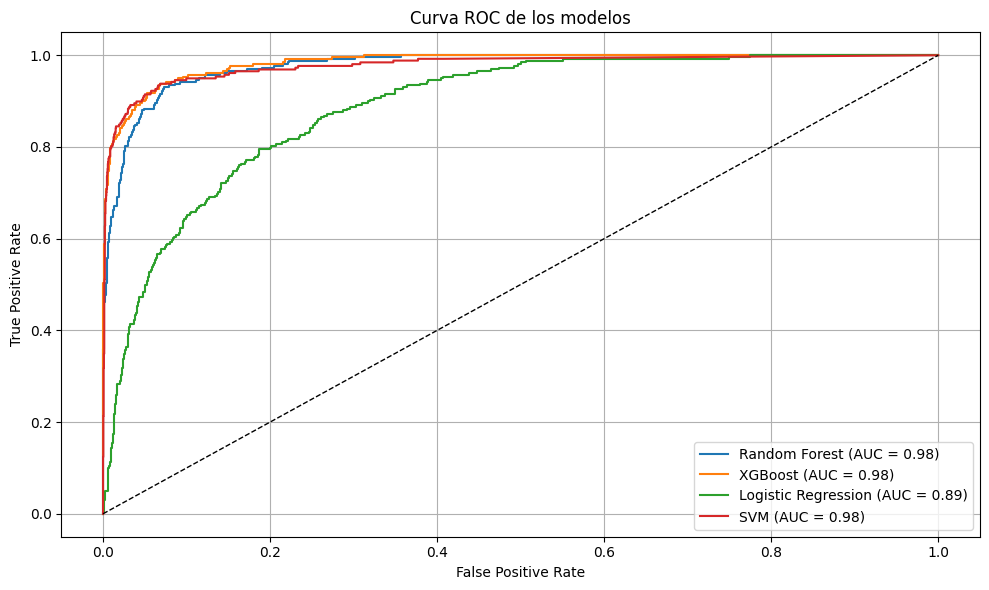

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import shap
import seaborn as sns

df_final = pd.read_csv('data_mammalia_B.csv')

df_final['is_mammalia'] = df_final['is_mammalia'].astype(bool).astype(int)
X = df_final.drop(columns=['is_mammalia'])
y = df_final['is_mammalia']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=45,
        min_samples_leaf=2,
        min_samples_split=10,
        max_features='log2',
        class_weight=None,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        eval_metric='logloss',
        reg_alpha=5.722944933801765e-05,
        reg_lambda=2.582087426040474e-07,
        max_depth=45,
        learning_rate=0.06291165369005537,
        n_estimators=300,
        subsample=0.8765344175237971,
        colsample_bytree=0.7951836653485003,
        gamma=0.5111269986940776,
        min_child_weight=8,
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        penalty='elasticnet',
        C=0.016483447278510855,
        solver='saga',
        l1_ratio=0.05159814722630618,
        max_iter=1000,
        class_weight=None,
        random_state=42
    ),
    "SVM": SVC(
        kernel='rbf',
        C=197.74206654091972,
        probability=True,
        random_state=42,
        gamma='scale',
        class_weight=None,
        tol=0.0002980782749092909
    ),
}

resultados = []

def evaluar(nombre, y_test, y_pred, y_proba):
    resultados.append({
        'Modelo': nombre,
        'Precision': round(float(precision_score(y_test, y_pred)), 4),
        'Recall': round(float(recall_score(y_test, y_pred)), 4),
        'F1-Score': round(float(f1_score(y_test, y_pred)), 4),
        'AUC': round(float(roc_auc_score(y_test, y_proba)), 4)
    })

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        modelo.fit(X_train_scaled, y_train_bal)
        y_pred = modelo.predict(X_test_scaled)
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        modelo.fit(X_train_bal, y_train_bal)
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)[:, 1]

    evaluar(nombre, y_test, y_pred, y_proba)

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = modelo.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC de los modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Mejores Modelos para M1-Mammalia

                Modelo  Precision  Recall  F1-Score     AUC
0        Random Forest     0.7736  0.8039    0.7885  0.9775
1              XGBoost     0.8681  0.8000    0.8327  0.9870
2  Logistic Regression     0.2997  0.8157    0.4384  0.8843
3                  SVM     0.8622  0.8588    0.8605  0.9790


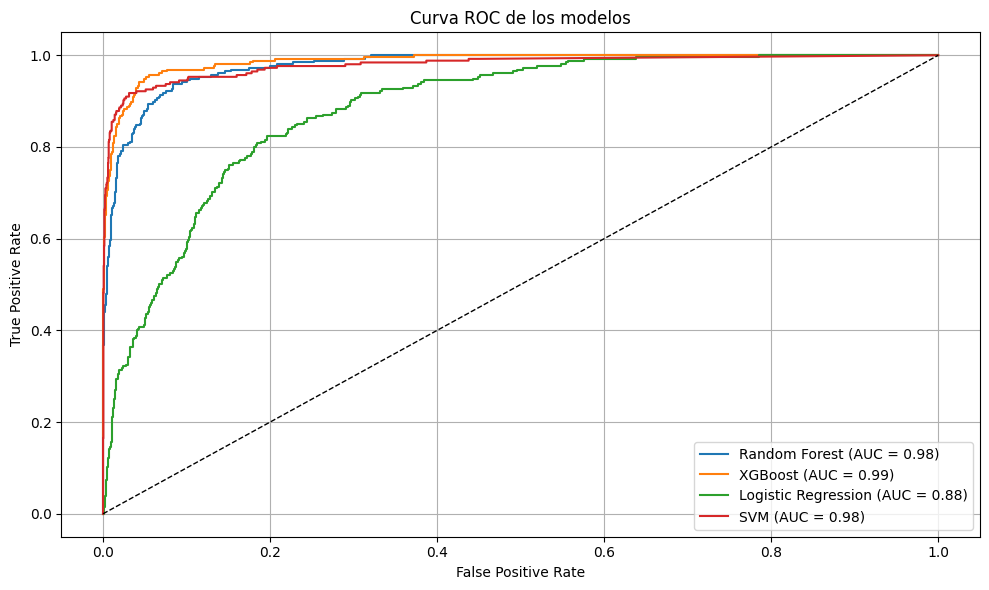

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import shap
import seaborn as sns

df_final = pd.read_csv('data_mammalia_M1.csv')

df_final['is_mammalia'] = df_final['is_mammalia'].astype(bool).astype(int)
X = df_final.drop(columns=['is_mammalia'])
y = df_final['is_mammalia']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        max_depth=45,
        min_samples_leaf=1,
        min_samples_split=15,
        max_features='sqrt',
        class_weight=None,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        eval_metric='logloss',
        reg_alpha=0.011138195279596601,
        reg_lambda=3.2593848276787604e-07,
        max_depth=15,
        learning_rate=0.131477961223003,
        n_estimators=300,
        subsample=0.826970545183038,
        colsample_bytree=0.8375781535543172,
        gamma=0.08243862343129116,
        min_child_weight=3,
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        penalty='l2',
        C=0.14259515533955422,
        solver='saga',
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ),
    "SVM": SVC(
        kernel='rbf',
        C=512.2014056149219,
        probability=True,
        random_state=42,
        gamma='scale',
        class_weight=None,
        tol= 0.001648293730588065
    ),
}

resultados = []

def evaluar(nombre, y_test, y_pred, y_proba):
    resultados.append({
        'Modelo': nombre,
        'Precision': round(float(precision_score(y_test, y_pred)), 4),
        'Recall': round(float(recall_score(y_test, y_pred)), 4),
        'F1-Score': round(float(f1_score(y_test, y_pred)), 4),
        'AUC': round(float(roc_auc_score(y_test, y_proba)), 4)
    })

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        modelo.fit(X_train_scaled, y_train_bal)
        y_pred = modelo.predict(X_test_scaled)
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        modelo.fit(X_train_bal, y_train_bal)
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)[:, 1]

    evaluar(nombre, y_test, y_pred, y_proba)

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = modelo.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC de los modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Mejores Modelos para M2-Mammalia

                Modelo  Precision  Recall  F1-Score     AUC
0        Random Forest     0.7812  0.8547    0.8163  0.9808
1              XGBoost     0.8756  0.8120    0.8426  0.9844
2  Logistic Regression     0.2977  0.7863    0.4319  0.8696
3                  SVM     0.8798  0.8761    0.8779  0.9819


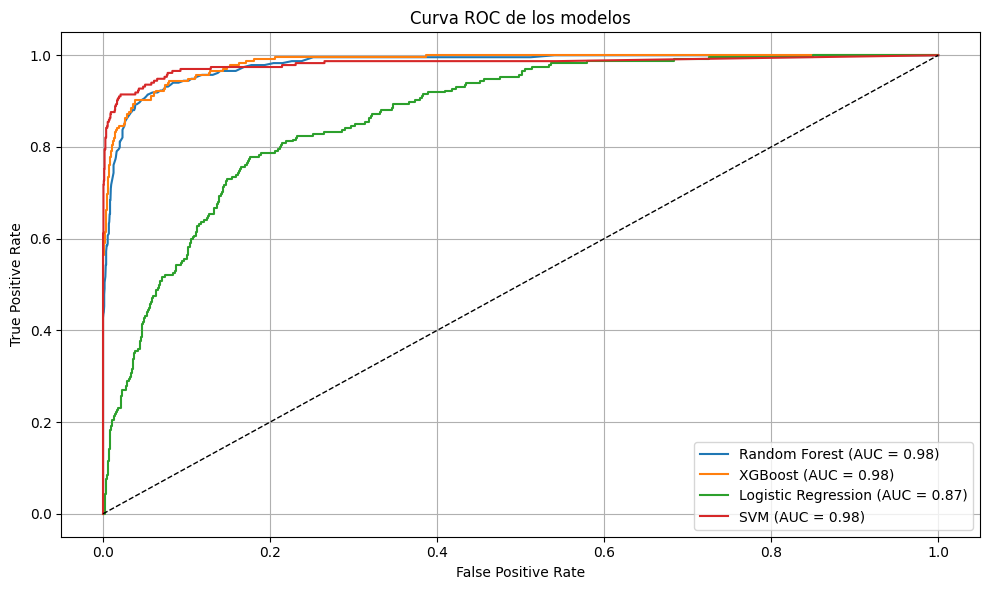

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import shap
import seaborn as sns

df_final = pd.read_csv('data_mammalia_M2.csv')

df_final['is_mammalia'] = df_final['is_mammalia'].astype(bool).astype(int)
X = df_final.drop(columns=['is_mammalia'])
y = df_final['is_mammalia']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=150,
        max_depth=45,
        min_samples_leaf=1,
        min_samples_split= 2,
        max_features='log2',
        class_weight='balanced',
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        eval_metric='logloss',
        reg_alpha=2.2138461962300003e-07,
        reg_lambda= 0.016597458234316943,
        max_depth=25,
        learning_rate=0.12179107286982993,
        n_estimators=300,
        subsample= 0.7773450958910062,
        colsample_bytree= 0.7871513921068591,
        gamma= 0.49426127705198697,
        min_child_weight=6,
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        penalty='l1',
        C=1.168007320678644,
        solver='saga',
        max_iter=1000,
        class_weight=None,
        random_state=42
    ),
    "SVM": SVC(
        kernel='rbf',
        C=51.87495047939414,
        probability=True,
        random_state=42,
        gamma='scale',
        class_weight=None,
        tol=0.008858480448481688
    ),
}

resultados = []

def evaluar(nombre, y_test, y_pred, y_proba):
    resultados.append({
        'Modelo': nombre,
        'Precision': round(float(precision_score(y_test, y_pred)), 4),
        'Recall': round(float(recall_score(y_test, y_pred)), 4),
        'F1-Score': round(float(f1_score(y_test, y_pred)), 4),
        'AUC': round(float(roc_auc_score(y_test, y_proba)), 4)
    })

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        modelo.fit(X_train_scaled, y_train_bal)
        y_pred = modelo.predict(X_test_scaled)
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        modelo.fit(X_train_bal, y_train_bal)
        y_pred = modelo.predict(X_test)
        y_proba = modelo.predict_proba(X_test)[:, 1]

    evaluar(nombre, y_test, y_pred, y_proba)

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for nombre, modelo in models.items():
    if nombre in ['Logistic Regression', 'SVM']:
        y_proba = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        y_proba = modelo.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC de los modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()